First, create objects for each wall and the particles.  Python (like many languages) allows you to define classes which are containers for attributes (information) and methods (functions).  We could probably make some progress without introducing this abstraction, but they will prove they useful as our code gets more complex.


As with many things in this minicourse, we try to write code that is clear, not clever.  There are better ways to do this, but I think this is easiest to learn.

Definitions:
- A class is a type of object.
- An instance is an object of that type.  Thus, we will make one class FlatWall and 4 instances of it.
- An attribute is a piece of data "attached" to an object
- A method is a funtion "attached" to an object.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

dim = 2
# cell size
x0 = 10
y0 = 10

# Define empty classes to start.  We will add stuff here later.
class Particles():
    pass

class Wall:
    pass

class FlatWall(Wall):
    pass

class CircleWall(Wall):
    pass

part = Particles()
part.num = 3
part.dim = dim
part.radius = np.full(part.num, 3.0) # an array of length part.num flled with the radius

wall = []
for i in range(4):
    wall.append(FlatWall())
    wall[i].dim = dim

wall[0].base_point = [x0, 0]
wall[0].normal = [-1, 0]
wall[0].tangent = [0, y0]

wall[1].base_point = [0, y0]
wall[1].normal = [0, -1]
wall[1].tangent = [-x0,0]

wall[2].base_point = [-x0, 0]
wall[2].normal = [1, 0]
wall[2].tangent = [0, -y0]

wall[3].base_point = [0, -y0]
wall[3].normal = [0, 1]
wall[3].tangent = [x0, 0]


wall.append(CircleWall())
wall[4].base_point = [0,0]
wall[4].radius = 1

We'd like to plot the cell to makes sure it looks right.  We'll create a mesh of points for each wall using numpy linspace to get 100 evenly spaced numbers from -1 to 1.

In [18]:
s = np.linspace(-1,1,100)
print(s)
for w in wall[:4]:
    w.mesh = w.base_point + s*w.tangent
print(wall[0].mesh.shape)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

ValueError: operands could not be broadcast together with shapes (100,) (2,) 

That did not work for 2 reasons.  The error says the shapes are not compatible.  We'll fix that later, but there is another problem we must handle first: base_point and tangent are python lists.  They do not know matrix algebra.  See:

In [19]:
L = [1,2,3]
print(L)
print(5*L)

[1, 2, 3]
[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


We wanted [5,10,15], but got 5 copies of L.  Numpy implements matrix algebra.  Numpy uses the name "array" for all vectors and matrices.

In [20]:
L = np.asarray([1,2,3])
print(L)
print(5*L)

[1 2 3]
[ 5 10 15]


So, we will convert everything to numpy arrays. We will also force them to be floats to avoid problems.  Notice of the array above has dtype int.

In [21]:
L.dtype

dtype('int32')

This can occasionally cause problems - it can trigger integer division rather than float division.  If this happens, we will get 3 / 2 = 1 or 2 rather than 1.5.  This was a bigger problem in earlier versions of Python which has been largerly fixed now.  But I still prefer to add safeguards when convenient.

In [22]:
print(type(wall[0].base_point))
for w in wall[:4]:
    w.base_point = np.asarray(w.base_point).astype(float)
    w.normal = np.asarray(w.normal).astype(float)
    w.tangent = np.asarray(w.tangent).astype(float)
print(type(wall[0].base_point))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Now, let's try the mesh again.

In [7]:
s = np.linspace(-1,1,100)
for w in wall[:4]:
    w.mesh = w.base_point + s*w.tangent
print(wall[0].mesh.shape)

ValueError: operands could not be broadcast together with shapes (100,) (2,) 

We still have the shape issue.  We want is s*w.tangent to be a 100x2 array.  Numpy will help us via its broadcasting rules: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
1. 

In [8]:
t = wall[0].tangent.copy()
try:
    m = s*t
    print(m.shape)
except:
    print('nope')

print(t.shape)
t = t[np.newaxis,:]
s = s[:,np.newaxis]
print(t.shape,s.shape)

try:
    m = s*t
    print(m.shape)
except:
    print('nope')


nope
(2,)
(1, 2) (100, 1)
(100, 2)


In [9]:
s = np.linspace(-1,1,100)
s = s[:,np.newaxis]
for w in wall[:4]:
    w.mesh = w.base_point + s*w.tangent[np.newaxis,:]
print(wall[0].mesh.shape)

(100, 2)


In [18]:
theta = np.linspace(0,2*np.pi,100)
w = wall[4]
w.mesh = np.array([np.cos(theta), np.sin(theta)]).T * w.radius + w.base_point

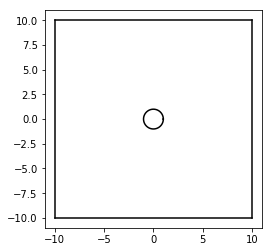

In [20]:
fig, ax = plt.subplots()
for w in wall:
    ax.plot(w.mesh[:,0], w.mesh[:,1], 'black')
ax.set_aspect('equal')
plt.show()

Here's a version that works in n dimensions if you define n-1 a list of n-1 tangent vectors.  It uses
- np.meshgrid: essentially the Cartesian product of the parameter values for each tangent
- "unpacking operator" *: mesh.shape is (pts,dim) so mesh.T.shape is (dim,pts).  The * unpacks the first dimesion, giving dim vectors of length pts corresponding to each dimension.  

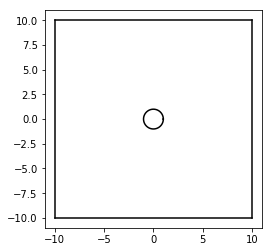

In [22]:
def flat_mesh(tangents):
    pts = 100
    N, D = tangents.shape
    grid = [np.linspace(-1, 1, pts) for n in range(N)]
    grid = np.meshgrid(*grid)
    grid = np.asarray(grid)
    mesh = grid.T.dot(tangents)
    return mesh

def sphere_mesh(dim, radius):
    pts = 100
    grid = [np.linspace(0, np.pi, pts) for d in range(dim-1)]
    grid[-1] *= 2
    grid = np.meshgrid(*grid)                           
    mesh = []
    for d in range(dim):
        w = radius * np.ones_like(grid[0])
        for j in range(d):
            w *= np.sin(grid[j])
        if d < dim-1:
            w *= np.cos(grid[d])
        mesh.append(w)
    return np.asarray(mesh).T

fig, ax = plt.subplots()
for w in wall:
    ax.plot(*(w.mesh.T), 'black')
ax.set_aspect('equal')
plt.show()

Let's collect the good code.  Later, we may want to put the mesh making code into a function or method.

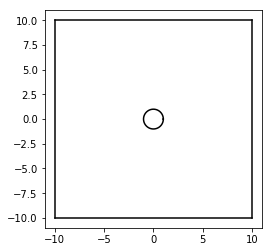

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dim = 2
# cell size
x0 = 10
y0 = 10

# We will add stuff here later
class Particles():
    pass

class Wall:
    pass

class FlatWall(Wall):
    pass

class CircleWall(Wall):
    pass

part = Particles()
part.num = 3
part.dim = dim
part.radius = np.full(part.num, 3.0) # an array of length part.num flled with the radius

wall = []
for i in range(4):
    wall.append(FlatWall())
    wall[i].dim = dim

wall[0].base_point = [x0, 0]
wall[0].normal = [-1, 0]
wall[0].tangent = [0, y0]

wall[1].base_point = [0, y0]
wall[1].normal = [0, -1]
wall[1].tangent = [-x0,0]

wall[2].base_point = [-x0, 0]
wall[2].normal = [1, 0]
wall[2].tangent = [0, -y0]

wall[3].base_point = [0, -y0]
wall[3].normal = [0, 1]
wall[3].tangent = [x0, 0]


wall.append(CircleWall())
wall[4].base_point = np.asarray([0,0])
wall[4].radius = 1

for w in wall[:4]:
    w.base_point = np.asarray(w.base_point).astype(float)
    w.normal = np.asarray(w.normal).astype(float)
    w.tangent = np.asarray(w.tangent).astype(float)


s = np.linspace(-1,1,100)
s = s[:,np.newaxis]
for w in wall[:4]:
    w.mesh = w.base_point + s*w.tangent[np.newaxis,:]

theta = np.linspace(0,2*np.pi,100)
w = wall[4]
w.mesh = np.array([np.cos(theta), np.sin(theta)]).T * w.radius + w.base_point

fig, ax = plt.subplots()
for w in wall:
    ax.plot(w.mesh[:,0], w.mesh[:,1], 'black')
ax.set_aspect('equal')
plt.show()

Now, let's initialize the particles.  Velocity is fairly simple, but position is harder.

In [ ]:
rnd = np.random.RandomState(42)  # so we all get the same random numbers
part.vel = rnd.normal(0, 1, [part.num, part.dim])
part.vel.shape

For position, we want to define the allowed values.  We will want this later to resolve collisions too, so we pause for a little more machinery.

In [ ]:
for w in wall:
    w.wp_min_gap = part

In [17]:
part.cell_size = [[-x0,x0],[-y0,y0]]
part.pos = np.full([part.num, part.dim], np.inf)
for p in range(part.num):
    for d in range(part.dim):
        part.pos[p,d] = rnd.uniform(part.cell_size[d][0], part.cell_size[d][1])
        

In [ ]:
import numpy as np

def get_wp_col_time():
    t = 
    nu = self.normal()
    dx = (part.pos - self.base_point)
    c = dx.dot(nu)
    b = -1 * part.vel.dot(nu)
    t = c / b
    return t

In [ ]:
def get_wp_col_time():
    nu = self.normal()
    dx = (part.pos - self.base_point)
    c = dx.dot(nu)
    b = -1 * part.vel.dot(nu)
    t = c / b
    return t

